## Step 1

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Load Titanic training data
df = pd.read_csv('train.csv')

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df.isna().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Step 2

In [21]:
import missingno as mn

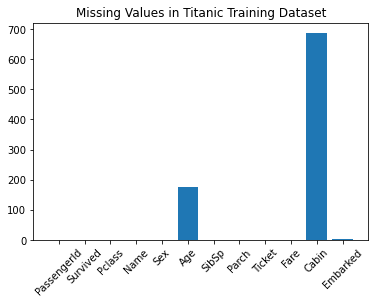

In [22]:
plt.title("Missing Values in Titanic Training Dataset")
plt.xticks(rotation=45)
plt.bar(x=df.isna().sum().index, height=df.isna().sum());

<AxesSubplot:>

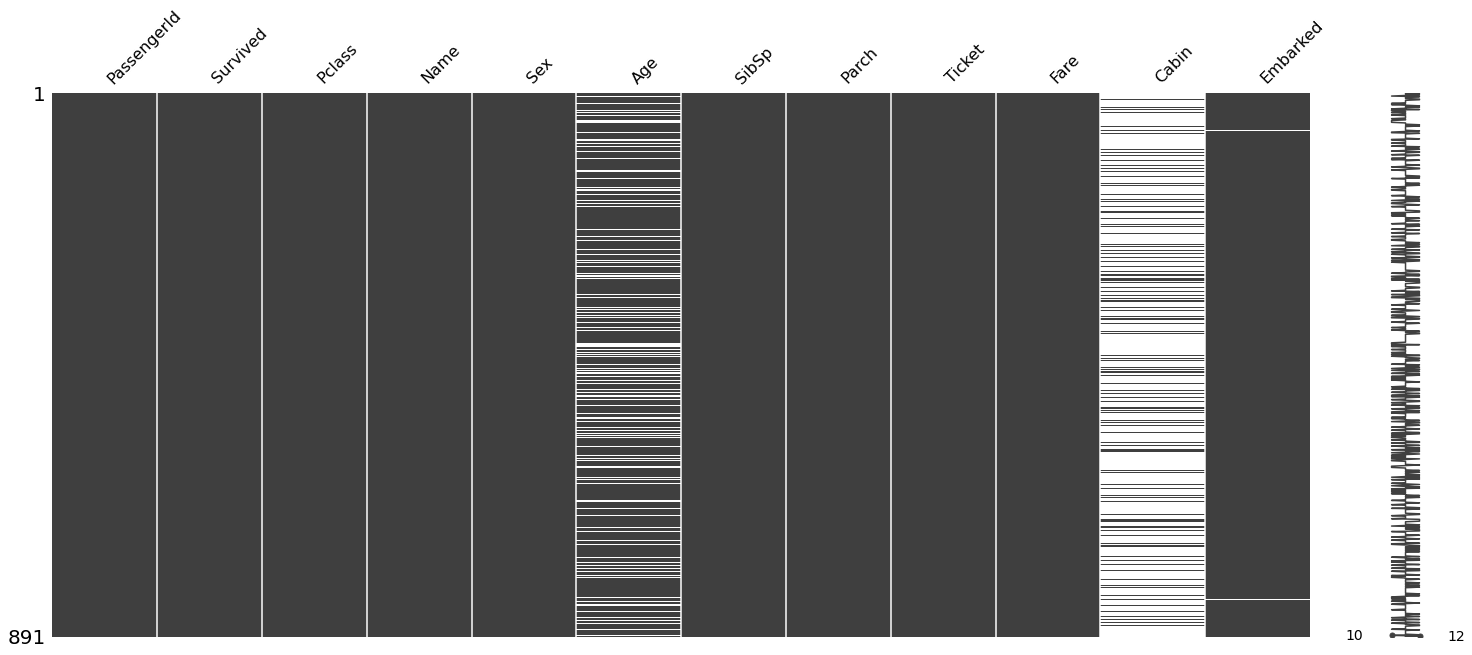

In [23]:
mn.matrix(df)

In [24]:
# Column with the max number of missing values & total missing values
df.isna().sum()[df.isna().sum() == max(df.isna().sum())]


Cabin    687
dtype: int64

In [25]:
# Drop rows where Embarked contains NaN
df = df[df.notna()['Embarked']]
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
# Dunno what cabbin
# df['Cabin'].isna()
df['Cabin'].fillna("**¯\\_(ツ)_/¯**", inplace=True)
#  = "**¯\\_(ツ)_/¯**"

In [44]:
df['Cabin'].head()

0    **¯\_(ツ)_/¯**
1              C85
2    **¯\_(ツ)_/¯**
3             C123
4    **¯\_(ツ)_/¯**
Name: Cabin, dtype: object

## Part 3

In [46]:
# Family Count column
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [47]:
df[['FamilyCount', 'SibSp', 'Parch']][df['FamilyCount'] > 2]

,FamilyCount,SibSp,Parch
7,4,3,1
13,6,1,5
16,5,4,1
24,4,3,1
25,6,1,5
...,...,...,...
850,6,4,2
858,3,0,3
863,10,8,2
885,5,0,5


In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount'],
      dtype='object')

In [49]:
# Reverend Check
df['IsReverend'] = df.apply(lambda x: 1 if "Rev." in x['Name'] else 0, axis=1)
df[['Name', 'IsReverend']].tail(10)


,Name,IsReverend
881,"Markun, Mr. Johann",0
882,"Dahlberg, Miss. Gerda Ulrika",0
883,"Banfield, Mr. Frederick James",0
884,"Sutehall, Mr. Henry Jr",0
885,"Rice, Mrs. William (Margaret Norton)",0
886,"Montvila, Rev. Juozas",1
887,"Graham, Miss. Margaret Edith",0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",0
890,"Dooley, Mr. Patrick",0


In [50]:
# One hot encoding of Embarking location
df['Embarked_C'] = df.apply(lambda x: 1 if x['Embarked'] == "C" else 0, axis=1)
df['Embarked_Q'] = df.apply(lambda x: 1 if x['Embarked'] == "Q" else 0, axis=1)
df['Embarked_S'] = df.apply(lambda x: 1 if x['Embarked'] == "S" else 0, axis=1)

In [51]:
df[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1


## Step 4

In [52]:
# Overall survival rate
df['Survived'].mean()

0.38245219347581555

In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [58]:
# Survival rate by gender
df.groupby(by="Sex").mean()['Survived']

# Males survived at a lower rate than women

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [60]:
# Survival rate by passenger class
df.groupby(by='Pclass').mean()['Survived']

# First class surivied at the highest rate, followed by second class and third, repectively

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [69]:
# Total number of Rev. survived
df.groupby(by='IsReverend').sum()['Survived']

# 0 Reverends survived

IsReverend
0    340
1      0
Name: Survived, dtype: int64

In [70]:
# Suvival rate of passengers with cabin: **¯\\_(ツ)_/¯**

df.groupby(by="Cabin").mean()['Survived']

# Pasengers riding in the dunno cabin faired worse than averge with a survival rate of only 29.99% 

Cabin
**¯\_(ツ)_/¯**    0.299854
A10              0.000000
A14              0.000000
A16              1.000000
A19              0.000000
                   ...   
F33              1.000000
F38              0.000000
F4               1.000000
G6               0.500000
T                0.000000
Name: Survived, Length: 147, dtype: float64

In [81]:
# Survival rate by port of embarkation
df.groupby(by="Embarked").mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [82]:
 # Survival rate by passenger class
df[df['Age'] < 12].groupby(by="Pclass").mean()['Survived']

# children in class 2 had a higher survival rate than in class 1, which is surprising. Children in class 3 did better than adults in class 3, but
# right around the ship average for passingers with a 2nd class ticket. So "good", all things considered?

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [101]:
# Did the Captain survive?
df['IsCrew'] = df.apply(lambda x: 1 if "Capt." in x['Name'] else 0, axis=1)
df[df['IsCrew'] == 1]

# Yes, Captain Edward Gifford Crosby went down with the ship


745    0
Name: Survived, dtype: int64

In [111]:
# Maximum Fare paid by a surviving passinger
df[df['Survived'] == 1]['Fare'].max()

# They paid $512.33 .. Roughly $5,000 by today's standards. 

512.3292

In [138]:
# Suvival rates by family size
df.groupby(by=['FamilyCount']).mean()

# Having a small family appars to have significantly boosted the survival rate


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCrew
FamilyCount,,,,,,,,,,,,
0,458.044860,0.300935,2.405607,32.131841,0.000000,0.000000,21.023035,0.007477,0.158879,0.106542,0.734579,0.000000
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129,0.012422,0.316770,0.055901,0.627329,0.000000
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482,0.000000,0.225490,0.058824,0.715686,0.009804
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510,0.000000,0.241379,0.000000,0.758621,0.000000
4,367.866667,0.200000,2.666667,20.818182,2.133333,1.866667,58.094453,0.000000,0.133333,0.000000,0.866667,0.000000
5,400.136364,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727,0.000000,0.000000,0.227273,0.772727,0.000000
6,355.750000,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667,0.000000,0.000000,0.000000,1.000000,0.000000
7,393.833333,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000,0.000000,0.000000,0.000000,1.000000,0.000000
10,481.714286,0.000000,3.000000,NaN,8.000000,2.000000,69.550000,0.000000,0.000000,0.000000,1.000000,0.000000


PassengerId  Survived        Age     SibSp     Parch  \
Pclass FamilyCount                                                         
1      0             479.065421  0.523364  40.791667  0.000000  0.000000   
       1             415.342857  0.728571  37.190476  0.728571  0.271429   
       2             542.875000  0.750000  39.500000  0.750000  1.250000   
       3             499.571429  0.714286  17.845714  1.000000  2.000000   
       4             527.500000  1.000000  19.500000  2.000000  2.000000   
       5             224.500000  0.500000  32.500000  2.500000  2.500000   
2      0             432.086538  0.346154  33.736559  0.000000  0.000000   
       1             429.176471  0.529412  30.573529  0.764706  0.235294   
       2             482.580645  0.677419  20.510645  0.838710  1.161290   
       3             488.769231  0.769231  21.384615  1.461538  1.538462   
       4             775.000000  1.000000  54.000000  1.000000  3.000000   
       5             438.000000  1.000000  24.000000  2.000000  3.000000   
3      0             459.435185  0.212963  28.235556  0.000000  0.000000   
       1             400.017544  0.350877  23.355238  0.807018  0.192982   
       2             377.510638  0.425532  22.039474  0.957447  1.042553   
       3             562.777778  0.666667  12.928571  1.444444  1.555556   
       4             307.333333  0.000000  17.000000  2.250000  1.750000   
       5             439.235294  0.000000  14.764706  2.941176  2.058824   
       6             355.750000  0.333333  15.166667  3.250000  2.750000   
       7             393.833333  0.000000  15.666667  4.333333  2.666667   
       10            481.714286  0.000000        NaN  8.000000  2.000000   

                          Fare  IsReverend  Embarked_C  Embarked_Q  \
Pclass FamilyCount                                                   
1      0             63.367327    0.000000    0.383178    0.000000   
       1             91.848039    0.000000    0.471429    0.014286   
       2             95.681075    0.000000    0.375000    0.041667   
       3            133.521429    0.000000    0.000000    0.000000   
       4            262.375000    0.000000    1.000000    0.000000   
       5            263.000000    0.000000    0.000000    0.000000   
2      0             14.066106    0.038462    0.057692    0.028846   
       1             24.682962    0.058824    0.176471    0.000000   
       2             31.693819    0.000000    0.064516    0.000000   
       3             36.575969    0.000000    0.230769    0.000000   
       4             23.000000    0.000000    0.000000    0.000000   
       5             18.750000    0.000000    0.000000    0.000000   
3      0              9.272052    0.000000    0.117284    0.166667   
       1             13.410023    0.000000    0.210526    0.140351   
       2             16.378277    0.000000    0.255319    0.106383   
       3             20.103689    0.000000    0.444444    0.000000   
       4             26.972233    0.000000    0.000000    0.000000   
       5             32.420588    0.000000    0.000000    0.294118   
       6             29.366667    0.000000    0.000000    0.000000   
       7             46.900000    0.000000    0.000000    0.000000   
       10            69.550000    0.000000    0.000000    0.000000   

                    Embarked_S    IsCrew  
Pclass FamilyCount                        
1      0              0.616822  0.000000  
       1              0.514286  0.000000  
       2              0.583333  0.041667  
       3              1.000000  0.000000  
       4              0.000000  0.000000  
       5              1.000000  0.000000  
2      0              0.913462  0.000000  
       1              0.823529  0.000000  
       2              0.935484  0.000000  
       3              0.769231  0.000000  
       4              1.000000  0.000000  
       5              1.000000  0.000000  
3      0              0.716049  0.000000  
       1       

## Step 5

In [140]:
import seaborn as sns

In [145]:
family_survival = df.groupby(by=['Pclass','FamilyCount'])['Pclass', 'FamilyCount', 'Survived'].mean()
# if we take a look deeper and break it down by ticket class, a family of 4 did the best, but you definitely didnt want to be traveling
# as a family of 5 or more

/var/folders/3y/cshc407d2zv7031zkk2k4r1r0000gn/T/ipykernel_34531/4294077474.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  family_survival = df.groupby(by=['Pclass','FamilyCount'])['Pclass', 'FamilyCount', 'Survived'].mean()


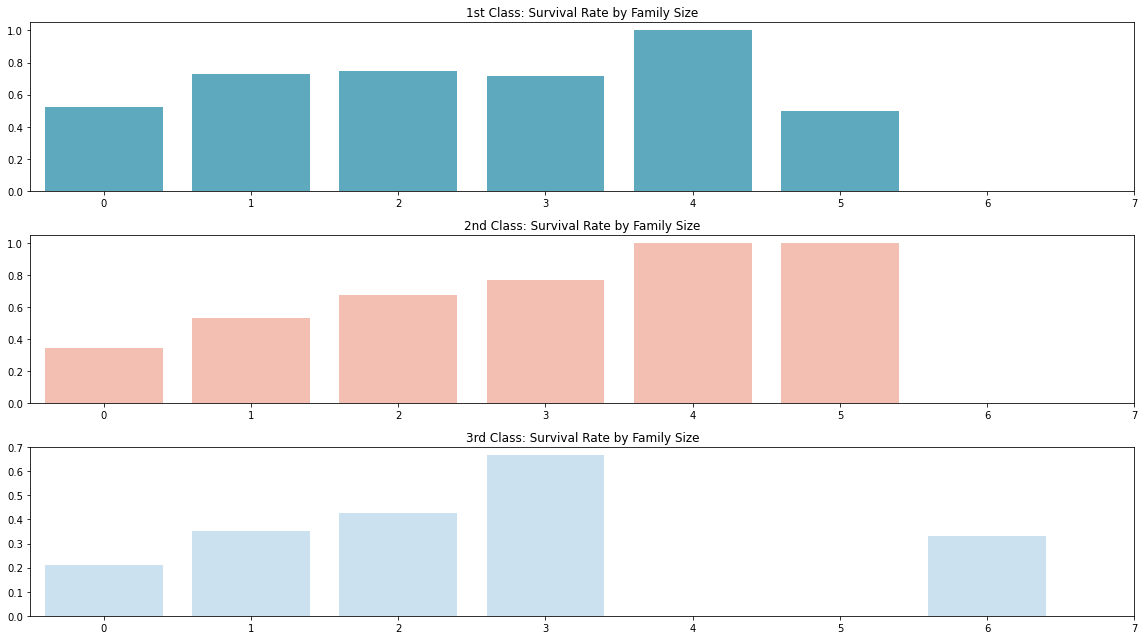

In [170]:
# Establish figure size.
plt.figure(figsize=(16, 9))

# Fig 1
ax1 = plt.subplot(3, 1, 1) # number of rows by number of columns by which individual plot to reference
ax1.bar(x=family_survival[family_survival['Pclass'] == 1]['FamilyCount'],
height=family_survival[family_survival['Pclass'] == 1]['Survived'], color="#5EA9BE")
ax1.set_title("1st Class: Survival Rate by Family Size")
ax1.set_xlim([-0.5, 7])

# Fig 2
ax2 = plt.subplot(3, 1, 2) # number of rows by number of columns by which individual plot to reference
ax2.bar(x=family_survival[family_survival['Pclass'] == 2]['FamilyCount'],
height=family_survival[family_survival['Pclass'] == 2]['Survived'], color='#F3BFB3')
ax2.set_title("2nd Class: Survival Rate by Family Size")
ax2.set_xlim([-0.5, 7])

# Fig 3
ax3 = plt.subplot(3, 1, 3) # number of rows by number of columns by which individual plot to reference
ax3.bar(x=family_survival[family_survival['Pclass'] == 3]['FamilyCount'],
height=family_survival[family_survival['Pclass'] == 3]['Survived'], color='#CBE1EF')
ax3.set_title("3rd Class: Survival Rate by Family Size")
ax3.set_xlim([-0.5, 7])

plt.tight_layout()
